# 1} Project Motivation

In today's market, many companies have a mobile presence. Often these companies provide free products/services in an attempt to transition their customers to a paid membership. Some examples are Youtube Red, Linkedin Premium and so on.

    1. Market :- The target audience is customers who use a company's free products. In this case study this refers to users who installed the company's the company's free mobile app.
    2. Product :- the paid memberships often provide enhanced versions of the free products already given for free, alongside new features.
    3. Goal :- The objective of the model is to predict which users will not subscribe to the paid membership so the greater marketing can go into trying to convert the user to a paid version of the app.
        

# 2} Project and dataset description

Project Motivation:- Here, we have a company that allows its customer to have a track of all the financial engagement of the customer through a paid version of a currently using mobile app.

Goal:- Identify whether he is likely to commit to the paid version. If he is not likely then we can reach to him with more dicount offers following the expenses he may have to convert the app to a paid one. The company doesnot want this offers to be circulated to everybody(specially the ones who are likely to subcribe to the paid version anyway) because by this they maynot end up with any actual profit. 

Data:- We have the access to the customer's app behavior data, (like whether the user played the financial games available, how many times did he play showing his likings towards the feature of the app and so on). But the data you have is just for a single day since the user enjoys a 24-hour free trial and you have to track within this stipulated time whether it will be right to give him offers based on his likeness to subscribe to the paid version.

Description by column names:-
    1. user:- a numerical id for different customers
    2. first_open:- day and time when the user first opened the app (to see when the user joins)
    3. dayofweek:- 0=Sunday, 1=Monday, 2=Tuesday, 3=Wednesday, 4=Thursday, 5=Friday, 6=Saturday
    4. hour:- Hour of the day when the user first opened the app (match with the time of first_open)
    5. age:- age of the user
    6. screen_list:- All the screen names that the user visited during the 24 hour trial. It is a comma separated string.  
    7. numscreens:- Number of screens the user visited(or that appears in the screen_list field).
    8. minigame:- Enhanced version of the feature working with provided to customers if he played the minigame. Important deciding factor whether to provide the offer or not. 0= not played, 1=played
    9. liked:- like button to symbolize whether he/she liked some feature of the app, 1=liked, 0=not liked 
    10. used_premium_feature:- many times a user use the free trial but they have a certain mindset not to use the premium since it cost money and its not so good, rather satisfied with the feature version available and donot need to upgrade. 0= never used premium, 1= used premium
    11. enrolled:- 1 = if enroll in the paid premium product, 0 = if not enroll 
    12. enrolled_date:- if enrolled then only the date is noted, cann even be after a year of the apps 24 hr trial.
   

# 3} Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

# 4} Importing dataset

In [2]:
dataset=pd.read_csv('appdata10.csv')
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
dataset.info() # no missing data except the last one

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [4]:
dataset.enrolled.value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

In [5]:
dataset.hour=dataset.hour.str.slice(1,3).astype(int)

In [6]:
dataset.describe() #gives the distributions of each of the numerical columns

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset2=dataset.copy().drop(columns=['user','first_open','enrolled','screen_list','enrolled_date'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [8]:
dataset2.shape

(50000, 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021321E45248>,
      dtype=object)

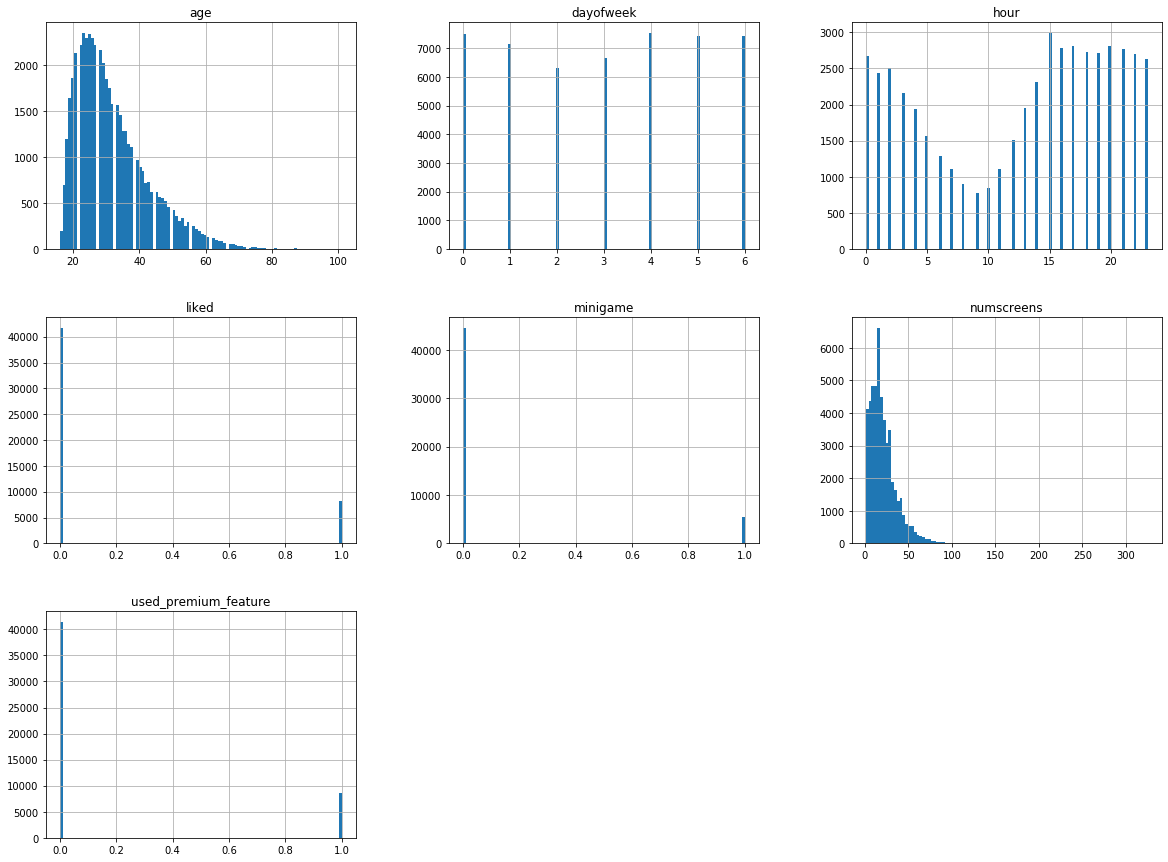

In [9]:
import matplotlib.pyplot as plt
dataset2.hist(bins=100, figsize=(20, 15),)

The above plot shows 
    1. age as a normalized distribution with the most preferred age group to be around 25
    2. day of the week is almost evenly distributed with the least on Tuesday
    3. Hour shows a dip at around 9, probably night time on the time standards of the data and therefore usage of mobile is less, so it can be expected as such


# 5} Building Correlations

In [10]:
#original correlations
corr_matrix = dataset.corr()
corr_matrix['enrolled'].sort_values(ascending=False) 

enrolled                1.000000
numscreens              0.209457
minigame                0.104979
dayofweek               0.011326
user                   -0.000519
liked                  -0.007022
used_premium_feature   -0.052703
hour                   -0.066694
age                    -0.131303
Name: enrolled, dtype: float64

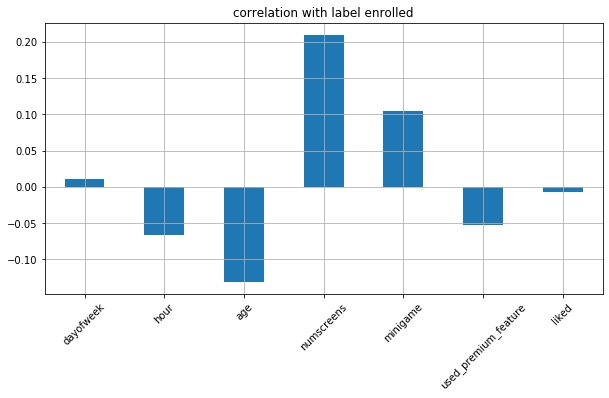

In [11]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(10,5),title="correlation with label enrolled",rot=45,grid=True)

In [12]:
corr_matrix

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
user,1.000000,-0.002620,-0.012301,-0.003481,0.000058,0.006556,0.004130,-0.000519,0.007473
dayofweek,-0.002620,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,0.011326,-0.005737
hour,-0.012301,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.066694,-0.001725
age,-0.003481,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.131303,-0.002593
numscreens,0.000058,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,0.209457,-0.007349
minigame,0.006556,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,0.104979,-0.012250
used_premium_feature,0.004130,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,-0.052703,0.001690
enrolled,-0.000519,0.011326,-0.066694,-0.131303,0.209457,0.104979,-0.052703,1.000000,-0.007022
liked,0.007473,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,-0.007022,1.000000


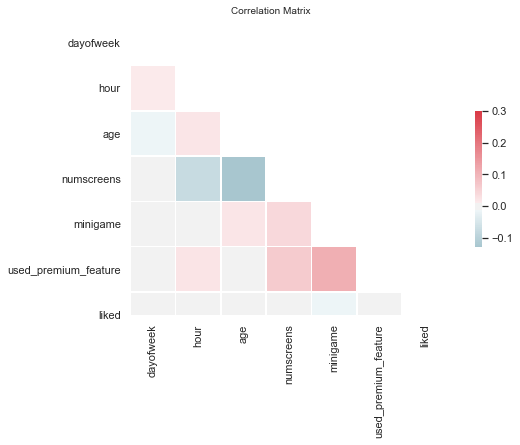

In [13]:
# Different representation of the correlation matrix
sns.set(style="white", font_scale=1)
corr=dataset2.corr() #compute the correlation matrix

#generate a mask for the upper triamgle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))
f.suptitle("Correlation Matrix", fontsize = 10)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


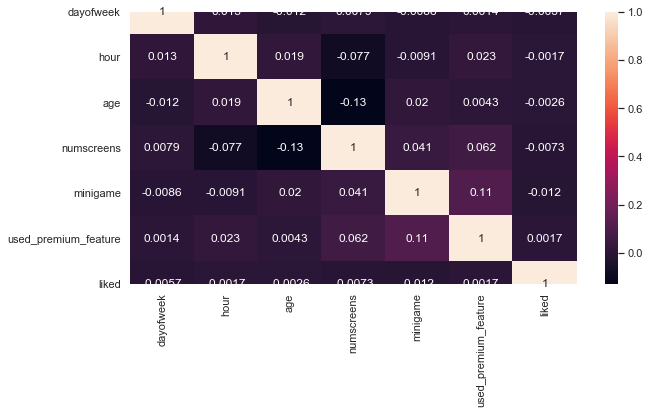

In [14]:
plt.figure(figsize=(10,5)) 
sns.heatmap(corr, annot=True) 

In [15]:
corr

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


# 6} Feature Engineering

Here we finely tune the response variables. Often we need to set a limit of when we expect the user to compare to a paid member. This is because we want to have to validate our model in future datasets. For example if we have a time limit of 1 week's enrollment to be considered, then we only have to wait one week after install in order to check whether the model was accurate in predicting the user. But if the model was to predict in the all-time enrollment, then we will have to wait until the end of all time to see if the model was accurate or not. So that is why it is important to have a particular date limit on the response variable.

To understand what time limit is optimum, we are going to plot distributions of our differences between the first open and the enrollment date, hence here we require feature engineering.

In [16]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

## 6.1} formatting the date columns

In [17]:
# Convert the dates into datetime objects, so that we can subtract hours from a date to the other
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

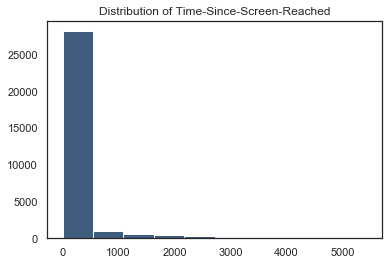

In [18]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

 Here we see that the person is most likely to enroll within the first 500 hrs, but we may be wrong, so lets look into deeper

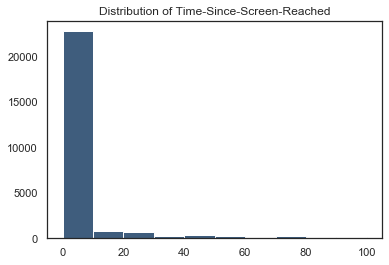

In [19]:
plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range=[0,100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

even here we see that within first 10 hrs he is most likely to enroll, but it is seen that there are enrollment signs even within the next 38 hrs 
So a better time consideration will be within first 48 hrs i.e. 2 days

In [20]:
# Hence change the column enrolled of dataset to 0 for those who enrolled after 48 hrs. We are setting it as the benchmark after
# which we can see with how much accuracy our ML model produces results (i.e checking criteria for the model's performance)
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open']) # drop these columns as we dont require them any more

In [21]:
dataset

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


## 6.2} Formatting the screen_list Field

 The screen_list is a comma-separated screen which tells us the screens that the user visited during the 24 hrs free trial time. But because this type of format is not suitable for our model, we need to convert it to actual format that the model can read. One of them, may be making each screen into their own columns, but there are so many screens, this may not be a correct decision. Luckily an analyst told us what are the top screens that the people used the most.

In [22]:
# Load Top Screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [23]:
# now we are just going to create columns for the popular screens and for the rest we are going to create another column "Other"
# No.of commas = no of screen list, hence counting commas can tell us the number of screens
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    # create columns for each top_screen and in the cells corresponding to the user, a boolean data will be stored showing he 
    # has opened the screen or not.
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    # delete the screens already counted and store it back to the screen_list
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",") # counting commas, help to know the number of screens left over and count them so that we can store it in others column
dataset = dataset.drop(columns=['screen_list']) # Now the screen list is not required for our model, hence drop it 


In [24]:
dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


In [25]:
dataset.shape

(50000, 68)

## 6.3} Funnel creation:- removing the correlated screens

In [26]:
# Funnel for removing the correlated savings screen 
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

In [27]:
# Funnel for removing the correlated credit monitoring screen
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [28]:
# Funnel for removing the correlated credit card screens
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [29]:
# Funnel for removing the loan screen
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [30]:
dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [31]:
dataset.shape

(50000, 50)

Hence the feature engineering part finished, we have all the columns that are required, in total 50 columns, with data present in them.
So as a final task export it to another csv file which will be used for our main model building process.

In [32]:
dataset.to_csv('new_appdata10.csv', index = False)